<a href="https://colab.research.google.com/github/pjcroxas/Remote-Sensing/blob/main/01_Time_Series_Data_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# !pip install earthpy
# !pip install rioxarray
# !pip install rasterstats

### I. Import Packages and get data

In [3]:
# Import necessary packages
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')


# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [4]:
# Download the data
data = et.data.get_data('colorado-flood')

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', "data"))

Extracted output to /root/earth-analytics/data/colorado-flood/.


In [5]:
# Define relative path to the data
file_path = os.path.join("colorado-flood",
                         "precipitation",
                         "805325-precip-daily-2003-2013.csv")

# Import the file as a pandas dataframe
boulder_precip_2003_2013 = pd.read_csv(file_path)
boulder_precip_2003_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030101 01:00,0.0,g,
1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030201 01:00,0.0,g,
2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 19:00,0.2,,
3,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 22:00,0.1,,
4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030203 02:00,0.1,,


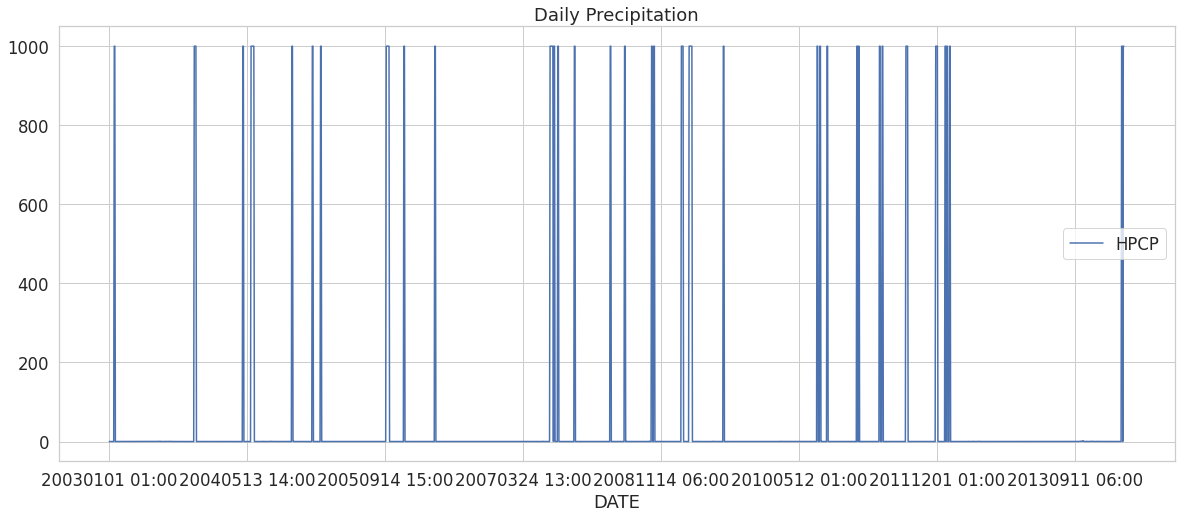

In [ ]:
boulder_precip_2003_2013.plot(x="DATE",
                              y="HPCP",
                              title="Daily Precipitation",
                              figsize=(20,8))

plt.show()

## Time Series Data Cleaning & Exploration

In [ ]:
boulder_precip_2003_2013["HPCP"].describe()

count    1840.000000
mean       51.192587
std       220.208147
min         0.000000
25%         0.100000
50%         0.100000
75%         0.100000
max       999.990000
Name: HPCP, dtype: float64

In [ ]:
boulder_precip_2003_2013.dtypes

STATION              object
STATION_NAME         object
ELEVATION           float64
LATITUDE            float64
LONGITUDE           float64
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

You may have observed several anomalies in the data.

1. The data seem to have a very large number: 999.99. More often than note, a value of 999 represents a no data value that needs to be removed from your data.
2. You may have noticed that your x axis date values in the plot look “messy”. When you see an x-axis like this but you know your data are time series, it’s most often caused by your datetime data not being read in properly as numeric date times.

You can address all of these issues using the following read_csv() parameters:

- parse_dates=: Column containing date information that should be read into the DataFrame as a datetime object.
- na_values=: Values in the file that should be replaced with NaN (Not a Number).
- index_col=1: optional – but this will make subsetting the data much easier

In [ ]:
boulder_precip_2003_2013 = pd.read_csv(file_path,
                                       parse_dates=["DATE"],
                                       index_col=["DATE"],
                                       na_values=["999.99"])

boulder_precip_2003_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [ ]:
boulder_precip_2003_2013.describe()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
count,1840.0,1840.000000,1840.000000,1746.000000
mean,1650.5,40.033851,-105.281106,0.111856
std,0.0,0.000045,0.000005,0.093222
min,1650.5,40.033800,-105.281110,0.000000
25%,1650.5,40.033800,-105.281110,0.100000
50%,1650.5,40.033890,-105.281110,0.100000
75%,1650.5,40.033890,-105.281100,0.100000
max,1650.5,40.033890,-105.281100,2.200000


In [ ]:
boulder_precip_2003_2013.dtypes

STATION              object
STATION_NAME         object
ELEVATION           float64
LATITUDE            float64
LONGITUDE           float64
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

In [ ]:
boulder_precip_2003_2013.index

DatetimeIndex(['2003-01-01 01:00:00', '2003-02-01 01:00:00',
               '2003-02-02 19:00:00', '2003-02-02 22:00:00',
               '2003-02-03 02:00:00', '2003-02-05 02:00:00',
               '2003-02-05 08:00:00', '2003-02-06 00:00:00',
               '2003-02-07 12:00:00', '2003-02-10 13:00:00',
               ...
               '2013-12-01 01:00:00', '2013-12-03 20:00:00',
               '2013-12-04 03:00:00', '2013-12-04 06:00:00',
               '2013-12-04 09:00:00', '2013-12-22 01:00:00',
               '2013-12-23 00:00:00', '2013-12-23 02:00:00',
               '2013-12-29 01:00:00', '2013-12-31 00:00:00'],
              dtype='datetime64[ns]', name='DATE', length=1840, freq=None)

In [ ]:
boulder_precip_2003_2013.reset_index()

,DATE,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
0,2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
1,2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2,2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
3,2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
4,2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
...,...,...,...,...,...,...,...,...,...
1835,2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,[,
1836,2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,],
1837,2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,0.1,,
1838,2013-12-29 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,[,


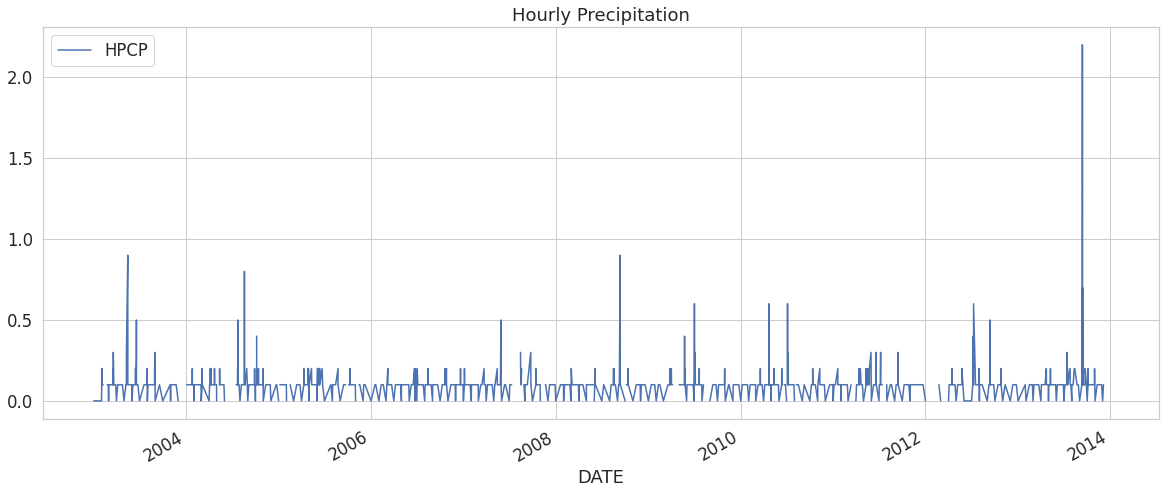

In [ ]:
boulder_precip_2003_2013.plot(y="HPCP",
                              title="Hourly Precipitation",
                              figsize=(20,8))

plt.show()

## Subset Time Series Data by Time

Once you have cleaned up your data, and assigned a datetime index, you can quickly begin to plot and summarize data by time periods. Below you subset the data for 2005.

In [ ]:
precip_2005 = boulder_precip_2003_2013["2005"]
precip_2005.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2005-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2005-01-02 06:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,{,
2005-01-02 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,},
2005-01-05 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-01-12 04:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [ ]:
# Remove missing data values
precip_2005_clean = precip_2005.dropna()

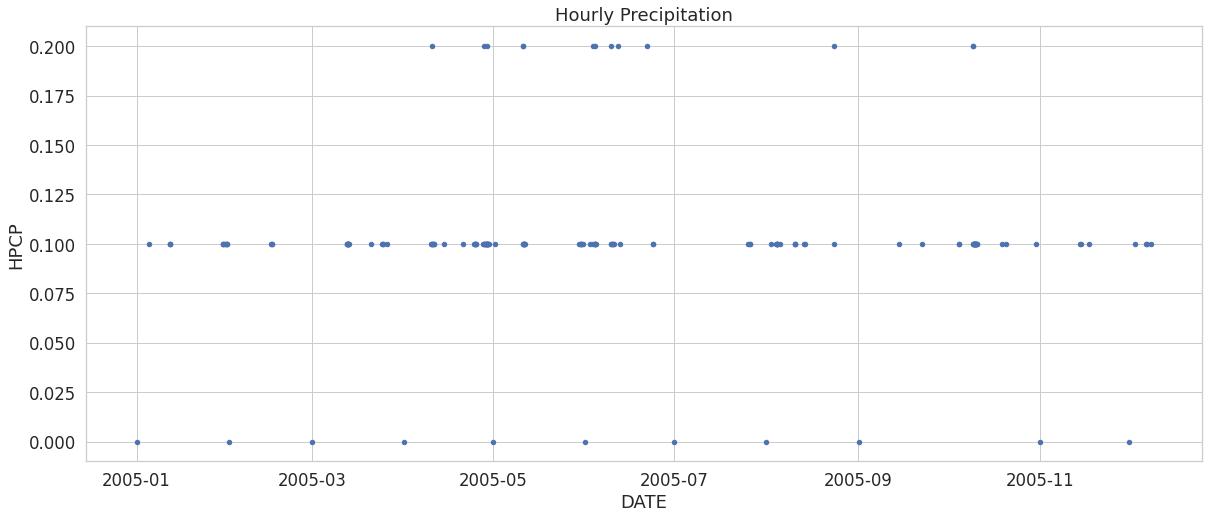

In [ ]:
precip_2005_clean.reset_index().plot(x="DATE",
                                     y="HPCP",
                                     title="Hourly Precipitation",
                                     kind="scatter",
                                     figsize=(20,8))

plt.show()

While you can plot data with pandas, it’s often easier to simply use matplotlib directly as this gives you more control of your plots. Below you create a scatter plot of the data using ax.scatter.

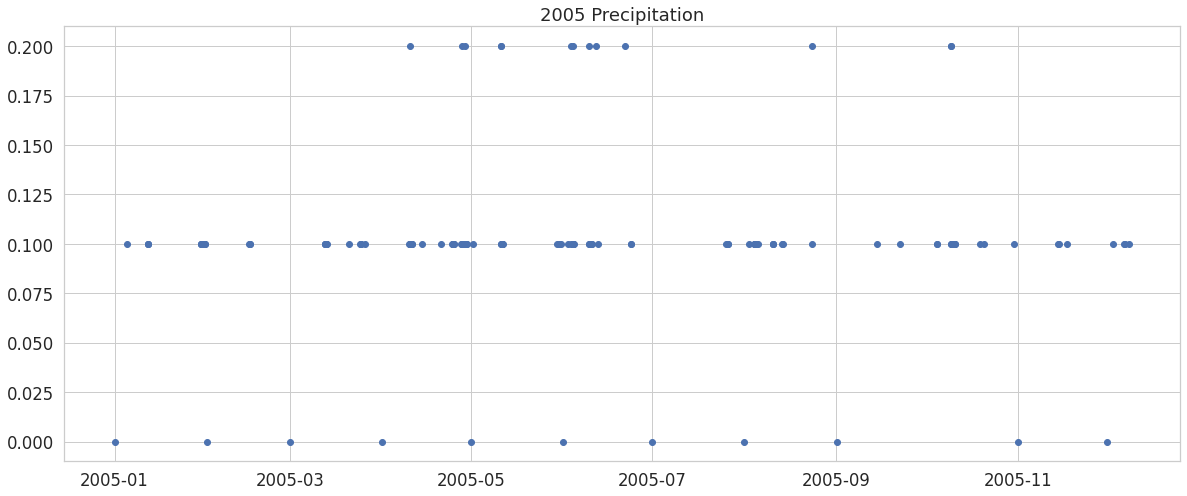

In [ ]:
f, ax = plt.subplots(figsize=(20,8))
ax.scatter(x=precip_2005_clean.index.values,
           y=precip_2005_clean["HPCP"])

ax.set_title("2005 Precipitation")

plt.show()

### Resample Time Series Data

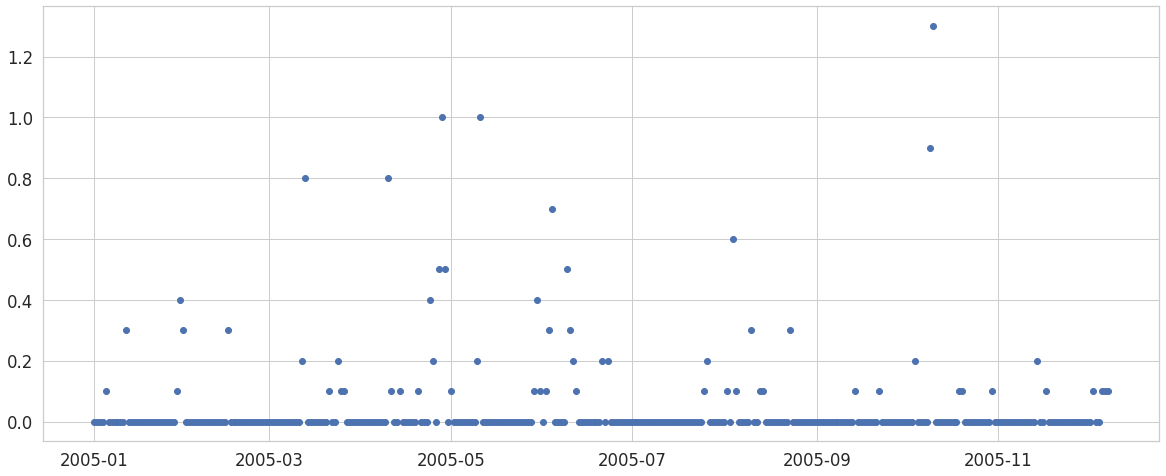

In [ ]:
precip_2005_daily = precip_2005_clean.resample("D").sum()
f, ax = plt.subplots(figsize=(20,8))
ax.scatter(x=precip_2005_daily.index.values,
           y=precip_2005_daily["HPCP"])
plt.show()

### Plot Multiple Axes

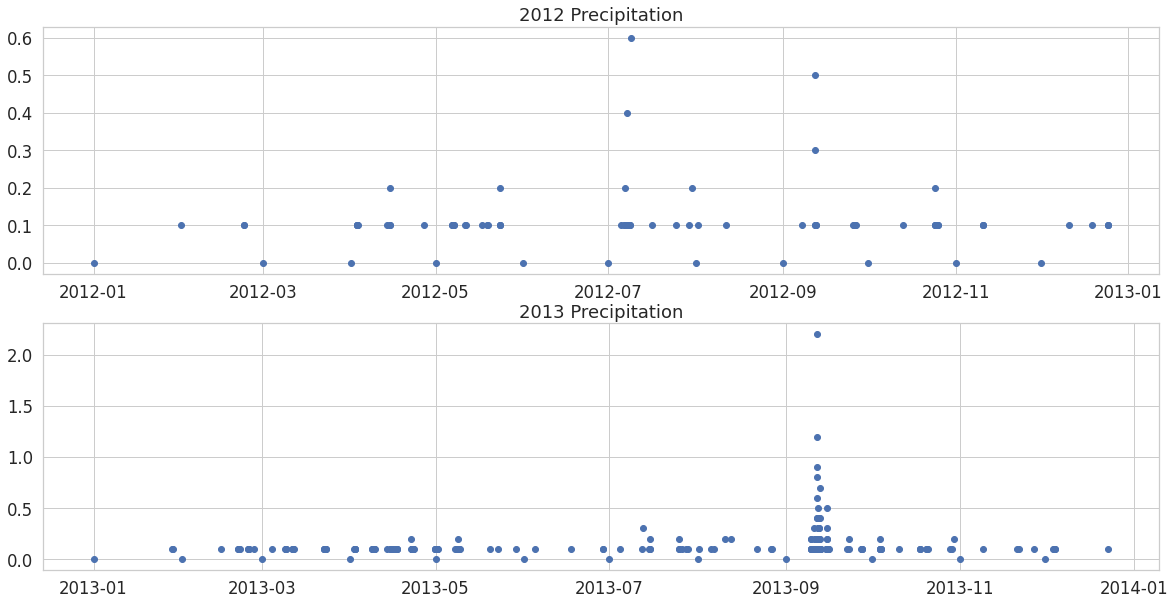

In [ ]:
precip_2012 = boulder_precip_2003_2013['2012'].dropna()
precip_2013 = boulder_precip_2003_2013['2013'].dropna()

f, (ax1, ax2) = plt.subplots(2,1, figsize=(20,10))
ax1.scatter(x=precip_2012.index.values,
            y = precip_2012['HPCP'])

ax2.scatter(x=precip_2013.index.values,
            y = precip_2013['HPCP'])

ax1.set_title("2012 Precipitation")
ax2.set_title("2013 Precipitation")

plt.show()

### Modify Plot x and y Limits

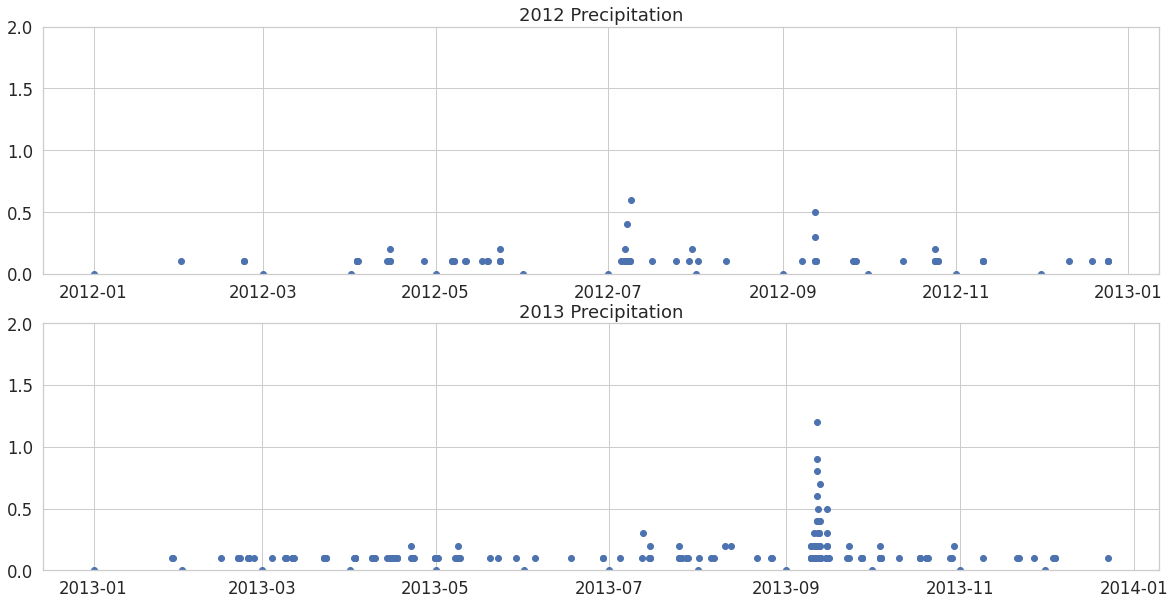

In [ ]:
precip_2012 = boulder_precip_2003_2013['2012'].dropna()
precip_2013 = boulder_precip_2003_2013['2013'].dropna()

f, (ax1, ax2) = plt.subplots(2,1, figsize=(20,10))
ax1.scatter(x=precip_2012.index.values,
            y = precip_2012['HPCP'])

ax2.scatter(x=precip_2013.index.values,
            y = precip_2013['HPCP'])

ax1.set_title("2012 Precipitation")
ax1.set(ylim=[0,2])
ax2.set_title("2013 Precipitation")
ax2.set(ylim=[0,2])

plt.show()


### Data Subsets

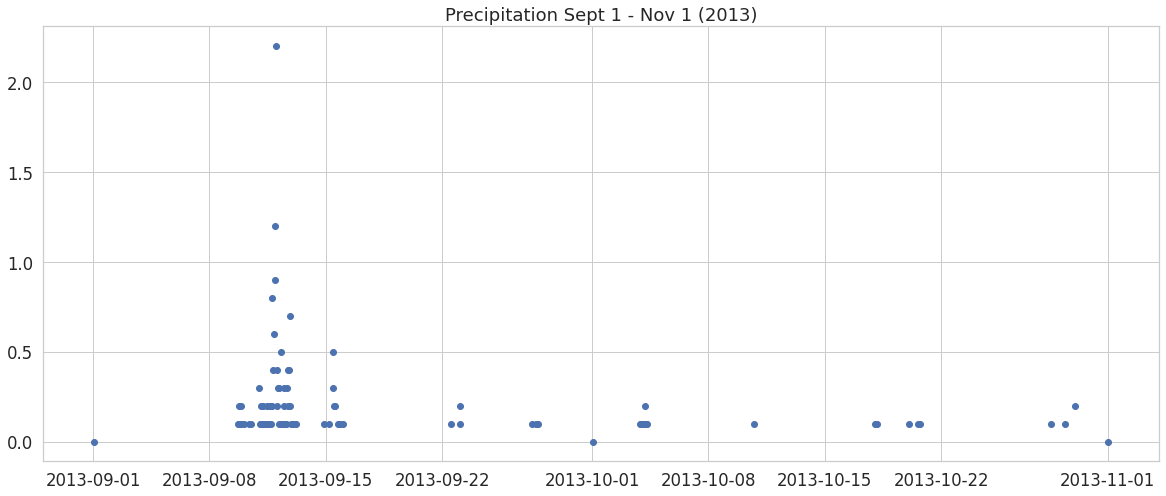

In [ ]:
precip_subset = boulder_precip_2003_2013["2013-09-01":"2013-11-01"]
# print(precip_subset)
plt.figure(figsize=(20,8))
plt.scatter(x=precip_subset.index.values,
            y=precip_subset["HPCP"])
plt.title("Precipitation Sept 1 - Nov 1 (2013)")
plt.show()

### Date Formatting

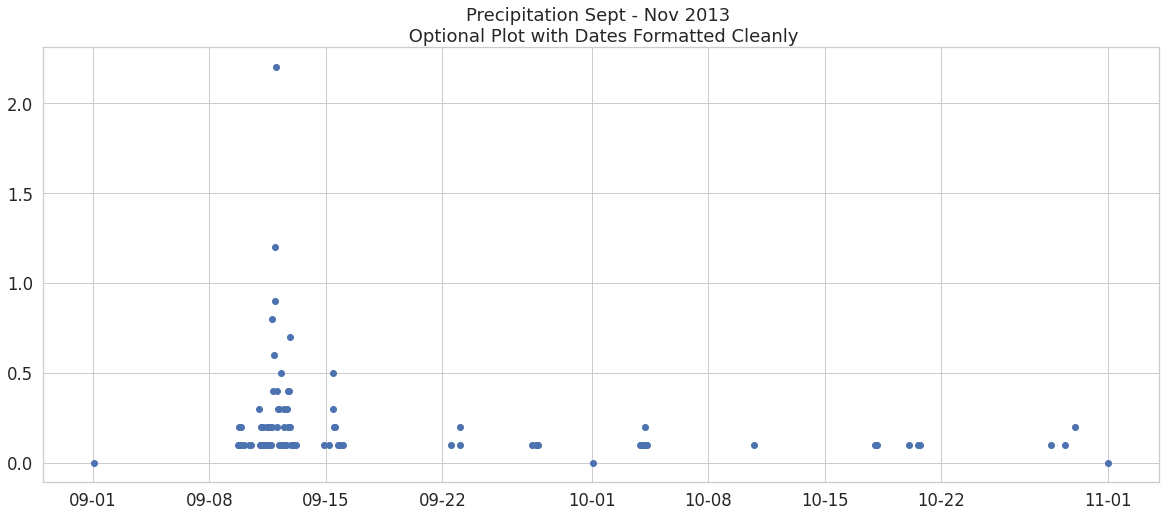

In [ ]:
from matplotlib.dates import DateFormatter
flood = boulder_precip_2003_2013['2013-09-01':'2013-11-01']

f, ax = plt.subplots(figsize=(20,8))
ax.scatter(x=flood.index.values,
           y=flood["HPCP"])

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.set(title="Precipitation Sept - Nov 2013 \n Optional Plot with Dates Formatted Cleanly")
plt.show()